In [ ]:
# takes the models created by XGB and and use them to predict the performance of the ecm1 (dinesh data)

In [3]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
test=pd.read_excel('ecm1_savings.xlsx','Sheet1')
testf=test.copy()
test=test[['Amb_Temp','Cload_%','kw_%']]
test.columns=['amb_temp', 'cload_%','total_kW']
# test

import warnings
warnings.filterwarnings('ignore')
m1='XGB_m_2'
m2='RFR_m_2'
with open(f'models/{m1}.pkl','rb') as f:
    XGB1=pickle.load(f)
with open(f'models/{m1}.pkl','rb') as f:
    XGB2=pickle.load(f)

[14:16:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[14:16:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  

XGB_m_2 Error: 0.28
RFR_m_2 Error: 0.34


Text(0.5, 1.0, 'RFR_m_2')

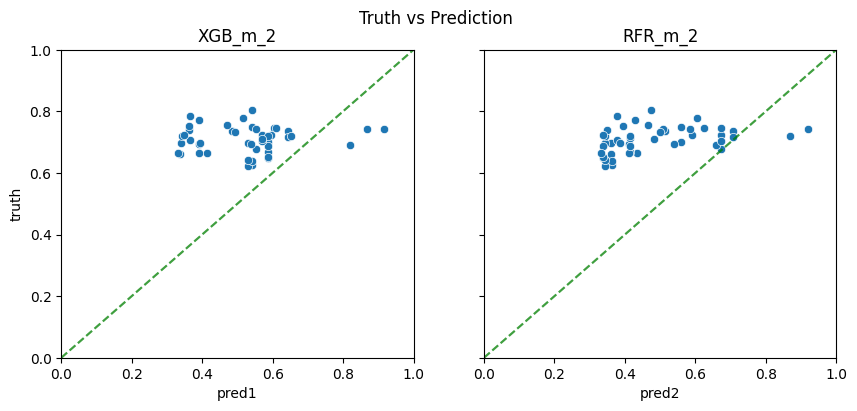

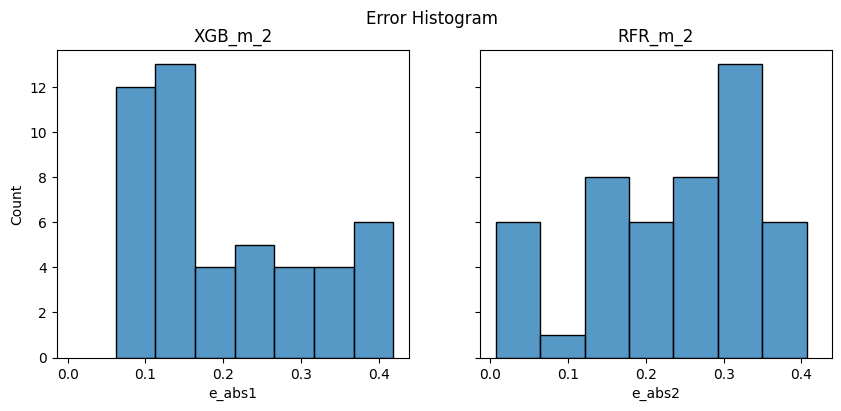

In [ ]:
test['pred1']=XGB1.predict(test[['amb_temp', 'cload_%']])
test['pred2']=XGB2.predict(test[['amb_temp', 'cload_%']])

test['truth']=test['total_kW']
# test['e']=test.apply(lambda x: (x.pred-x.truth),axis=1)
test['e_abs1']=test.apply(lambda x: abs(x.pred1-x.truth),axis=1)
test['e_abs2']=test.apply(lambda x: abs(x.pred2-x.truth),axis=1)
test['MAE_1']=test.apply(lambda x: abs(x.pred1-x.truth)/x.truth,axis=1)
test['MAE_2']=test.apply(lambda x: abs(x.pred2-x.truth)/x.truth,axis=1)
xgb1=test.MAE_1.mean()
xgb2=test.MAE_2.mean()

# region plot

fig,(ax1,ax2)=plt.subplots(1,2,figsize=[10,4],sharey=True,sharex=True)
sns.scatterplot(x=test.pred1,y=test.truth,ax=ax1)
sns.scatterplot(x=test.pred2,y=test.truth,ax=ax2)
sns.lineplot(x=[0, 1], y=[0, 1], linestyle="dashed", color="green",alpha=0.5,legend='full',ax=ax1)
sns.lineplot(x=[0, 1], y=[0, 1], linestyle="dashed", color="green",alpha=0.5,legend='full',ax=ax2)
plt.suptitle('Truth vs Prediction')

ax1.set_title(m1)
ax2.set_title(m2)
ax1.set_ylim([0,1])
ax1.set_xlim([0,1])

print(f'{m1} Error: {xgb1:.2f}')
print(f'{m2} Error: {xgb2:.2f}')


fig,(ax3,ax4)=plt.subplots(1,2,figsize=[10,4],sharey=True,sharex=True)
sns.histplot(x=test.e_abs1,ax=ax3)
sns.histplot(x=test.e_abs2,ax=ax4)
sns.lineplot(x=[0, 1], y=[0, 1], linestyle="dashed", color="green",alpha=0.5,legend='full',ax=ax1)
sns.lineplot(x=[0, 1], y=[0, 1], linestyle="dashed", color="green",alpha=0.5,legend='full',ax=ax2)
plt.suptitle('Error Histogram')

ax3.set_title(m1)
ax4.set_title(m2)


# endregion

In [ ]:
sns.histplot(x=test.e_abs1,ax=ax3)
sns.histplot(x=test.e_abs2,ax=ax4)

<AxesSubplot: title={'center': 'RFR_m_2'}, xlabel='e_abs2', ylabel='Count'>

In [ ]:
test

,amb_temp,cload_%,total_kW,pred1,pred2,truth,e_abs1,e_abs2,MAE_1,MAE_2
0,20.880645,0.393193,0.698079,0.338915,0.361050,0.698079,0.359164,0.337029,0.514504,0.482795
1,22.650000,0.299146,0.697265,0.531301,0.344661,0.697265,0.165964,0.352604,0.238021,0.505695
2,26.296774,0.106083,0.685853,0.586701,0.338467,0.685853,0.099152,0.347386,0.144568,0.506502
3,29.760000,0.142032,0.695236,0.390723,0.412478,0.695236,0.304513,0.282758,0.438000,0.406708
4,33.093548,0.179224,0.714910,0.587004,0.415159,0.714910,0.127907,0.299752,0.178913,0.419286
5,35.806667,0.253818,0.723606,0.570062,0.672102,0.723606,0.153544,0.051505,0.212193,0.071178
6,37.348387,0.305266,0.735657,0.643954,0.706482,0.735657,0.091704,0.029176,0.124656,0.039659
7,36.845161,0.454355,0.746642,0.602964,0.623142,0.746642,0.143678,0.123500,0.192432,0.165407
8,35.090000,0.478468,0.750184,0.542797,0.559418,0.750184,0.207388,0.190766,0.276449,0.254293
9,31.693548,0.411614,0.735179,0.485304,0.513129,0.735179,0.249875,0.222050,0.339883,0.302036


### optimizing factor

In [ ]:
# x=np.arange(0.2,0.6,0.01)
# y=[]
# for i in x:
#     test['pred']=XGB.predict(test[['amb_temp', 'cload_%']])+i
#     # test['pred']=XGB.predict(test[['amb_temp', 'cload_%']])*i
#     test['truth']=test['total_kW']
#     test['error']=test.apply(lambda x: (x.pred-x.truth),axis=1)
#     y.append(abs(test.error).mean())
# # test



In [ ]:
# sns.set_theme()
# ax=sns.lineplot(x=x,y=y)
# ax.set_ylabel('Error')
# ax.set_xlabel('factor')

In [ ]:
# print(abs(test.m_error).mean())
# sns.histplot(test.abserror,binwidth=0.03,kde=True)

In [ ]:
# ax1=sns.scatterplot(x=test.pred,y=test.truth)
# ax1.set_title('XGBoost')
# lims=[0.5,1]
# ax1.set_xlim(lims)
# ax1.set_ylim(lims)

In [ ]:
# test.columns
# test[['amb_temp', 'cload_%', 'total_kW', 'pred', 'truth']].head()


### Taking Average Temperature and compare it to resulting temp

In [ ]:

temp0=pd.read_csv('monthlyTemp.csv',index_col='Timestamp')
tfinal=testf[['Month','Amb_Temp','Chillers kWh','Cload_%','kw_%','kWh saving']]
# testf.columns
temp=temp0[temp0['count']>2400].drop('count',axis=1)
temp=temp.drop('2020-01-31') # have average of .7 C temp
temp=temp.drop('2022-06-30') # have average of 24 C compared to 35 C
temp=temp.drop('2022-07-31') # have average of 17 C compared to 35 C

# temp.month=[temp.index]
temp['month']=pd.to_datetime(temp.index).month
tt=temp.groupby('month').agg(['mean','std'])
# maximum standard diviation after that is 1.49 C
tt.columns=tt.columns.droplevel(0) # to remove first level header
# tt[tt['std']>5] # 1,6,7 have high std
# tt['std'].max()
tt


,mean,std
month,,
1,20.947765,0.212275
2,21.518680,1.213689
3,25.565121,0.569395
4,28.693283,1.496252
5,32.736593,0.797210
6,35.352888,0.488063
7,37.358886,0.294044
8,37.143269,0.345144
9,34.970617,0.012662


In [ ]:
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
inv_mon= {v : k for k,v in month_names.items()}
tt['month_n']=tt.index
tt['Month']=tt.index.map(lambda x: month_names[x]) # somehow this is faster!!
# tt['month']=tt.index.map(month_names) # works the same

res=tfinal.merge(tt)
res.columns=['Month','Amb_Temp_old', 'Chillers kWh', 'cload_%', 'kw_%', 'kWh saving', 'amb_temp', 'std','month_n']
res.columns

rr=res.groupby('month_n').mean(numeric_only=True)
# res
rr['dif']=rr.Amb_Temp_old-rr.amb_temp
rr[['Amb_Temp_old','amb_temp', 'dif']]
# rr.columns

,Amb_Temp_old,amb_temp,dif
month_n,,,
1,20.880645,20.947765,-0.067120
2,22.650000,21.518680,1.131320
3,26.296774,25.565121,0.731653
4,29.760000,28.693283,1.066717
5,33.093548,32.736593,0.356955
6,35.806667,35.352888,0.453779
7,37.348387,37.358886,-0.010499
8,36.845161,37.143269,-0.298107
9,35.090000,34.970617,0.119383


In [ ]:
abs(rr.dif).mean()

0.36071757267010146

#### Comparing Dinesh Consumption to Model Consumption

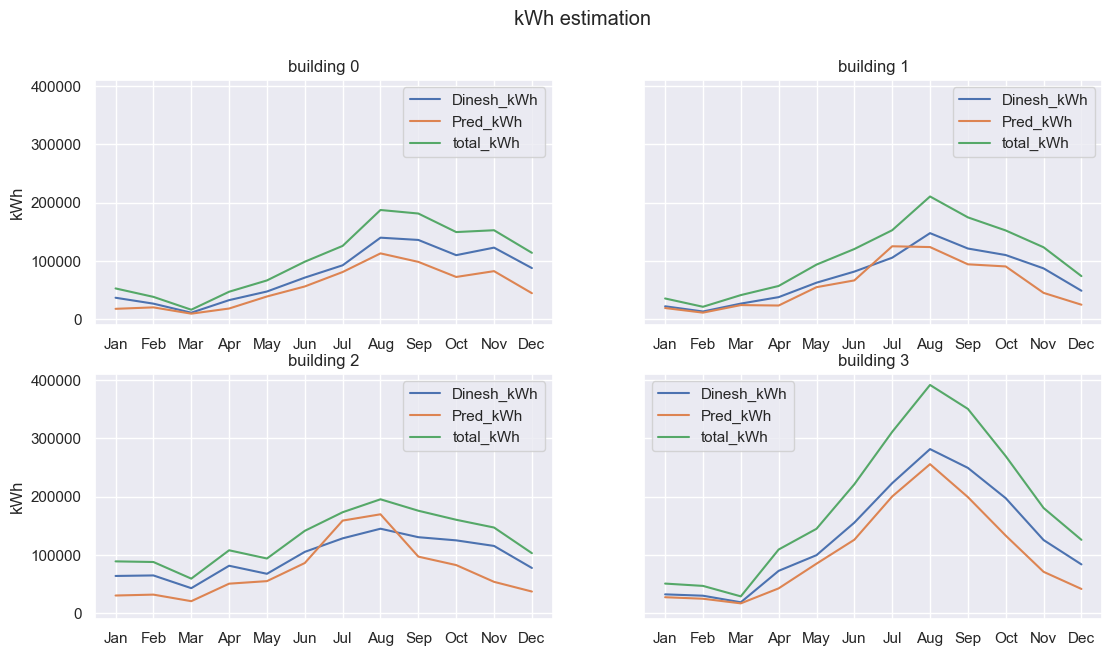

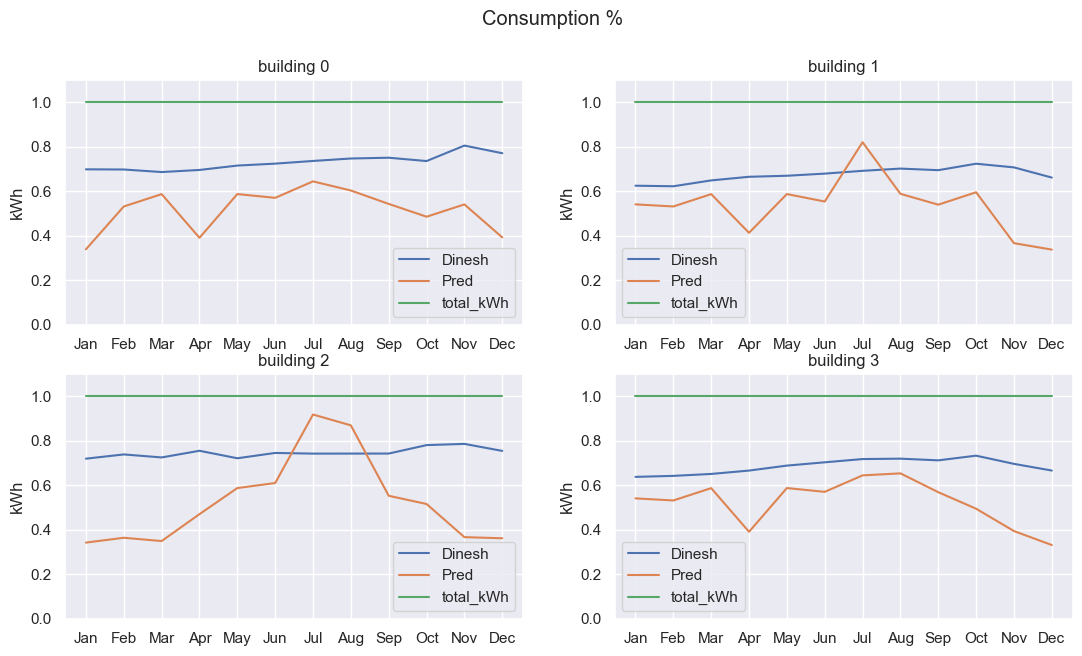

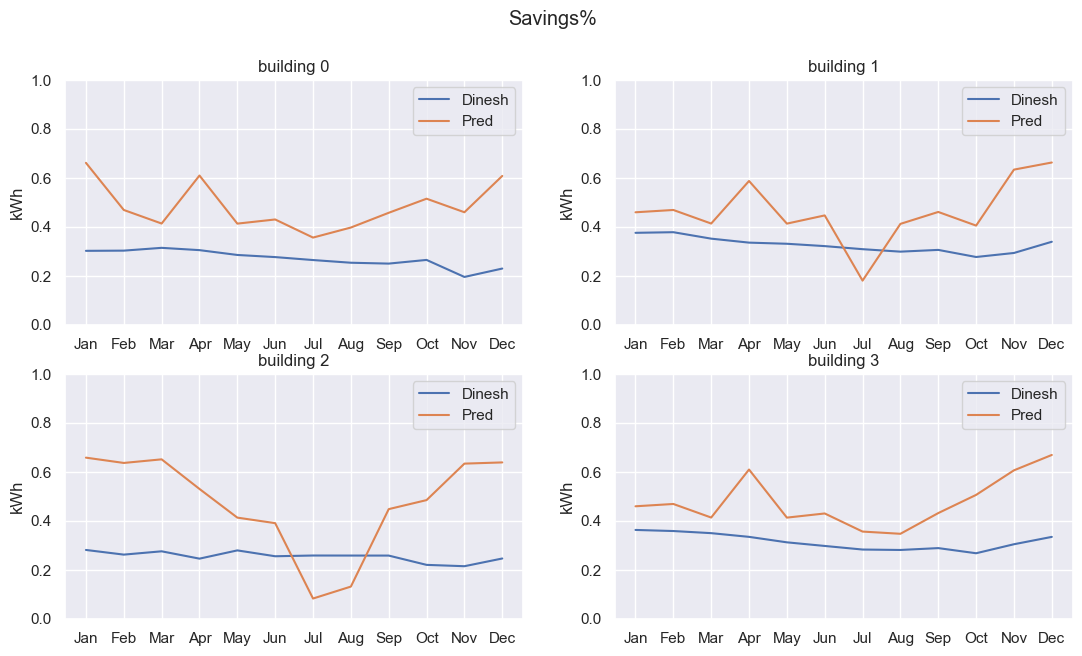

In [101]:
test2=testf.copy()[['Amb_Temp','Chillers kWh','Cload_%','kw_%','New chillers kWh','Month']]
test2.columns=['amb_temp','Ch_kWh_truth', 'cload_%','total_kW','din_ch_kwh','Month']
test2['pred1']=XGB1.predict(test2[['amb_temp', 'cload_%']])
test2['pred_ch_kwh']=test2.pred1*test2.Ch_kWh_truth
test2
# testf
sns.set()
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=[13,7],sharey=True)
fig.suptitle('kWh estimation')
for i,a in enumerate([ax1,ax2,ax3,ax4]):
    data=test2.iloc[12*i:12*(i+1)]
    # sns.lineplot(data[['din_ch_kwh','pred_ch_kwh']],ax=a)
    sns.lineplot(x=data.Month,y=data['din_ch_kwh'],ax=a,label='Dinesh_kWh')
    sns.lineplot(x=data.Month,y=data['pred_ch_kwh'],ax=a,label='Pred_kWh')
    sns.lineplot(x=data.Month,y=data['Ch_kWh_truth'],ax=a,label='total_kWh')
    a.set_xlabel('')
    a.set_ylabel('kWh')
    # a.legend()
    a.set_title(f'building {i}')
    # print(f'for building {i}:\nDinesh:{data.}')
    
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=[13,7])
fig.suptitle('Consumption %')
for i,a in enumerate([ax1,ax2,ax3,ax4]):
    data=test2.iloc[12*i:12*(i+1)]
    dinsav=(data['din_ch_kwh']/data['Ch_kWh_truth'])
    predsav=(data['pred_ch_kwh']/data['Ch_kWh_truth'])
    max=(data['Ch_kWh_truth']/data['Ch_kWh_truth'])
    sns.lineplot(x=data.Month,y=dinsav,ax=a,label='Dinesh')
    sns.lineplot(x=data.Month,y=predsav,ax=a,label='Pred')
    sns.lineplot(x=data.Month,y=max,ax=a,label='total_kWh')
    a.set_ylim([0,1.1])
    a.set_xlabel('')
    a.set_ylabel('kWh')
    # a.legend()
    a.set_title(f'building {i}')
    # print(f'for building {i}:\nDinesh:{data.}')
    
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=[13,7])
fig.suptitle('Savings%')
for i,a in enumerate([ax1,ax2,ax3,ax4]):
    data=test2.iloc[12*i:12*(i+1)]
    dinsav=1-(data['din_ch_kwh']/data['Ch_kWh_truth'])
    predsav=1-(data['pred_ch_kwh']/data['Ch_kWh_truth'])
    # max=1-(data['pred_ch_kwh']/data['Ch_kWh_truth'])
    sns.lineplot(x=data.Month,y=dinsav,ax=a,label='Dinesh')
    sns.lineplot(x=data.Month,y=predsav,ax=a,label='Pred')
    # sns.lineplot(x=data.Month,y=data['Ch_kWh_truth'],ax=a,label='total_kWh')
    a.set_ylim([0,1])
    a.set_xlabel('')
    a.set_ylabel('kWh')
    # a.legend()
    a.set_title(f'building {i}')
    # print(f'for building {i}:\nDinesh:{data.}')



Total Savings for the four buildings:
Dinesh Model: 1753361.41
Prediction  : 2795333.42
Dinesh's Model is 59.43% conservative in predicting savings


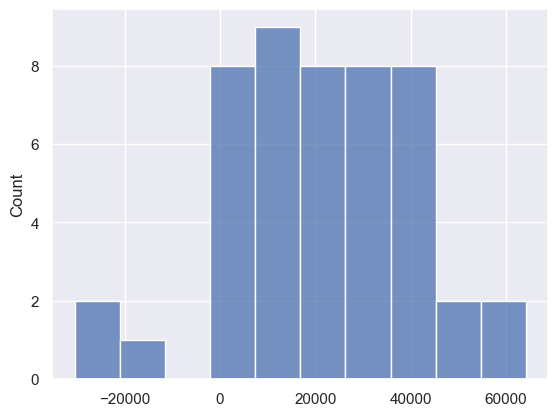

In [91]:
ax=sns.histplot((test2.din_ch_kwh-test2.pred_ch_kwh),bins=10)
# ax.set_xscale('symlog')
din_savings=test2.Ch_kWh_truth-test2.din_ch_kwh
pred_savings=test2.Ch_kWh_truth-test2.pred_ch_kwh
print(f'Total Savings for the four buildings:\nDinesh Model: {din_savings.sum():.2f}\nPrediction  : {pred_savings.sum():.2f}')
print(f"Dinesh's Model is {pred_savings.sum()/din_savings.sum()-1:.2%} conservative in predicting savings")